# Plot Simulation Results

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

Matplotlib created a temporary config/cache directory at /tmp/matplotlib-5t596kgt because the default path (/tf/.cache/matplotlib) is not a writable directory; it is highly recommended to set the MPLCONFIGDIR environment variable to a writable directory, in particular to speed up the import of Matplotlib and to better support multiprocessing.


In [2]:
QUERY = 'callie_janelle'
# QUERY = 'yuan_taipei'
# QUERY = 'luis_lego'

yields = pd.read_hdf(f'/tf/primo/data/simulation/targets/{QUERY}.h5')
dists = pd.read_hdf('/tf/primo/data/targets/query_target_dists.h5')

In [3]:
df = yields.join(dists[QUERY].rename('euclidean_distance'))

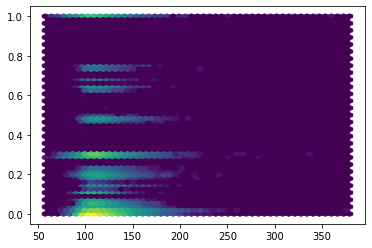

In [4]:
# Color here represents density.
# For more info on Hexbins, check out https://holypython.com/python-visualization-tutorial/creating-hexbin-charts/
plt.hexbin(df.euclidean_distance, df.duplex_yield, gridsize=50, bins='log')

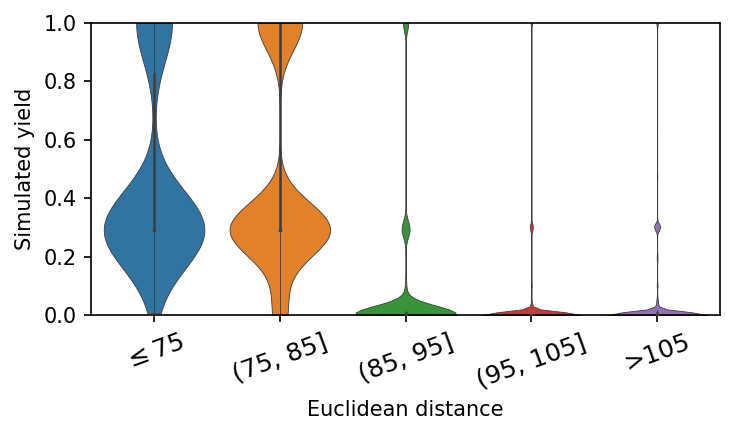

In [5]:
thresholds = [75, 85, 95, 105]
bin_labels = np.array(
    ["$\leq%d$" % thresholds[0]]
    + ["(%d, %d]" % (a,b) for (a,b) in zip(thresholds,thresholds[1:])]
    + [">%d" % thresholds[-1]]
)

plt.figure(figsize = (5, 3), dpi=150)
(lambda data:
    sns.violinplot(

        x='dist_bin',
        y='duplex_yield',
        data=data,
        linewidth=0.4,
        fliersize=0.5,
        cut=0.0,
        scale='width',
        order = bin_labels
    )
)(
    df
    .assign(
        dist_bin = lambda df: bin_labels[np.digitize(df.euclidean_distance, thresholds, right=True)]
    )
)
plt.xlabel("Euclidean distance")
plt.xticks(rotation=20)
[label.set_fontsize(12) for label in plt.gca().get_xticklabels()]
plt.ylabel("Simulated yield")
plt.ylim(0,1)
plt.tight_layout()

In [1]:
import io
import zipfile
from PIL import Image


def get_image_from_zip(imgid):
    """
    Given the hexadecimal image id, returns image
    """
    zip_path = f'/tf/open_images/targets/images/train_{imgid[:1]}.zip'
    zip_file = zipfile.ZipFile(zip_path, 'r')
    img_file = zip_file.read(f"train_{imgid[:1]}/{imgid}.jpg")
    return Image.open(io.BytesIO(img_file))

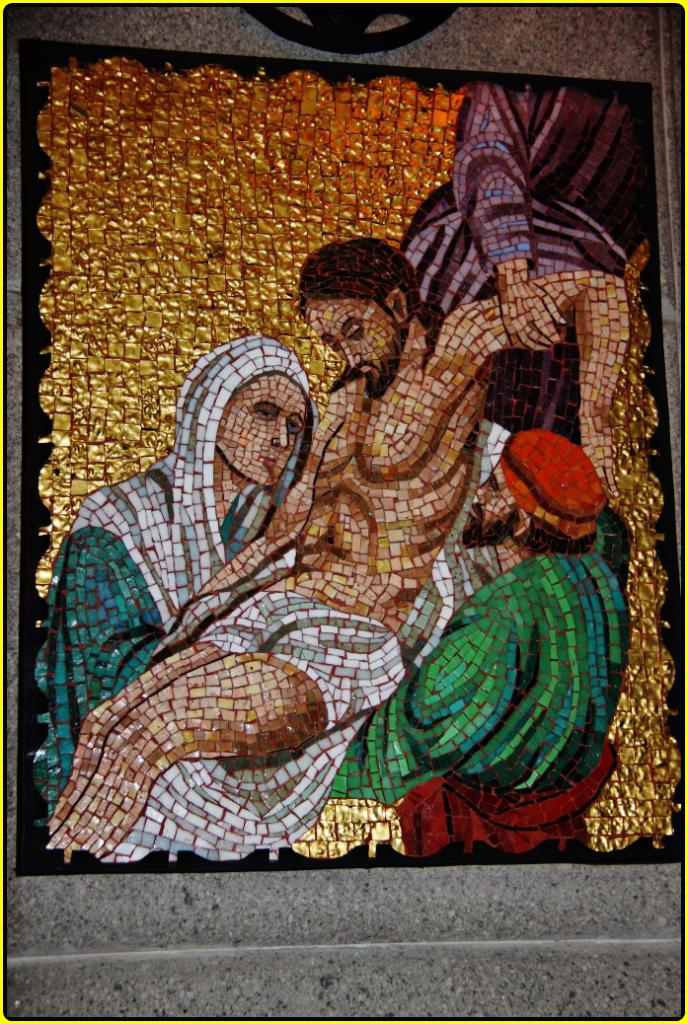

In [4]:
get_image_from_zip('000002c707c9895e')

In [6]:
# def nn_recall(scores, distances, k=10, n_thresholds=500, thresholds=None):
#     # Nearest-neighbor recall.
#     if thresholds is None:
#         thresholds = np.linspace(scores.min(), scores.max(), n_thresholds)
#         thresholds[0] = (thresholds[0] + thresholds[1])/2
        
#     retrieved = scores >= thresholds.reshape(-1,1)
#     p_retrieved = retrieved.mean(1)
    
#     neighbors = distances.argsort()[:k]
    
#     nn_recall = retrieved[:, neighbors].mean(1)
    
#     return nn_recall, p_retrieved, thresholds

# def nn_recall_discrete(scores, distances, k=100, n_thresholds=500):
#     thresholds = np.unique(np.logspace(0, np.log10(scores.max()), n_thresholds).astype(int))
    
#     retrieved = scores >= thresholds.reshape(-1,1)
#     p_retrieved = retrieved.mean(1)
    
#     neighbors = distances.argsort()[:k]
    
#     nn_recall = retrieved[:, neighbors].mean(1)
    
#     return nn_recall, p_retrieved, thresholds

# def plot_baselines(nn_k, n_targets, plt_fn = lambda ax: ax.loglog):
#     def plot(ax):
#         ax_plot = plt_fn(ax)
#         unif = np.linspace(0,1,100)
#         ax_plot(unif, unif, alpha=0.2, ls='--', color='black', label='Chance')
#         ax_plot(unif, unif * nn_k/n_targets, alpha=0.2, ls='-.', color='black', label='Oracle')
#     return plot

In [7]:
# dn,p,t = nn_recall(
#     df.duplex_yield.values/df.duplex_yield.max(),
#     df.euclidean_distance.values,
#     k=100,
#     thresholds=1-np.logspace(-14, 0, 100)
# )

In [8]:
# plt.scatter(n,p,c=t, cmap=plt.cm.viridis_r)
# plot_baselines(100, len(df))(plt.gca())
# plt.xlabel("100-NN Recall")
# plt.ylabel("Proportion Retrieved")
# plt.colorbar(label="Yield Threshold")

In [9]:
# list(t)

In [10]:
# plt.scatter(n,p,c=np.log10(1-t), cmap=plt.cm.viridis_r)
# plot_baselines(100, len(df))(plt.gca())
# plt.xlabel("100-NN Recall")
# plt.ylabel("Proportion Retrieved")
# plt.colorbar(label="log(1-Yield Threshold)")

In [11]:
# np.log10(1-t)

In [12]:
# df.sort_values('duplex_yield', ascending=False)

In [13]:
# from PIL import Image

In [14]:
# # The items with top 'k' duplex yields.
# k_top = 100
# tops = df.sort_values('duplex_yield', ascending=False)[:k_top]

In [15]:
# rows = 4
# cols = 5
# fig, axarr = plt.subplots(rows, cols, figsize = (10,6), dpi=300)
# # Plot the top number of highest simulayed yield target-query yields (the number plotted will be rows * cols). 
# for ix, ax in enumerate(axarr.flat):
#     if ix < len(tops):
#         imgid = tops.index[ix]
#         img = Image.open('/tf/open_images/extended_targets/images/%s/%s.jpg' % (imgid[:2], imgid))
#         new_height = img.width / 1.5
#         crop = img.crop([0,img.height/2 - new_height/2,img.width,img.height/2 + new_height/2])
#         ax.imshow(crop)
#     ax.set_xticks(())
#     ax.set_yticks(())
# plt.tight_layout()
# plt.savefig('/tf/primo/fig.pdf')